In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import files
files.upload()

Saving Housing.csv to Housing (1).csv


{'Housing (1).csv': b'price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus\r\n13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished\r\n12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished\r\n12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished\r\n12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished\r\n11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished\r\n10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished\r\n10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished\r\n10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished\r\n9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished\r\n9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished\r\n9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished\r\n9681000,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished\r\n9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished\r\n9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished\r\n9240000,7800,3,2,2,yes,no,no,n

In [2]:
import os
os.listdir('/content')

['.config', 'Housing (1).csv', 'Housing.csv', 'sample_data']

In [3]:
import pandas as pd
df=pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.shape

(545, 13)

In [11]:
df.head
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [14]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent.sort_values(ascending=False)

missing_percent

,0
price,0.0
area,0.0
bedrooms,0.0
bathrooms,0.0
stories,0.0
mainroad,0.0
guestroom,0.0
basement,0.0
hotwaterheating,0.0
airconditioning,0.0


In [15]:
missing_df = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_%': missing_percent
})

missing_df

,Missing_Count,Missing_%
price,0,0.0
area,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
stories,0,0.0
mainroad,0,0.0
guestroom,0,0.0
basement,0,0.0
hotwaterheating,0,0.0
airconditioning,0,0.0


In [18]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

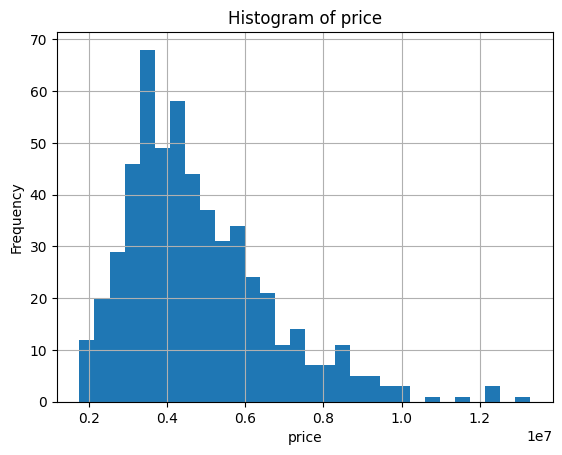

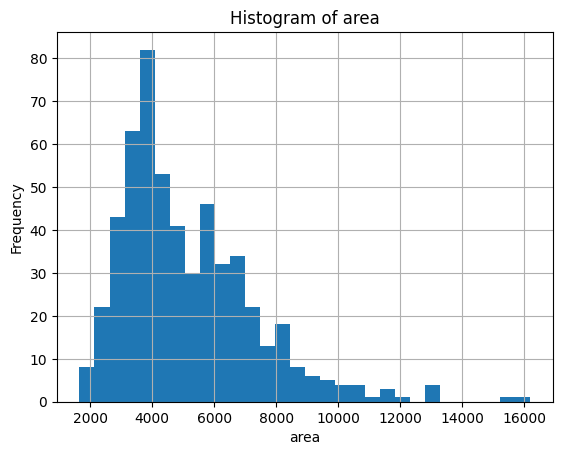

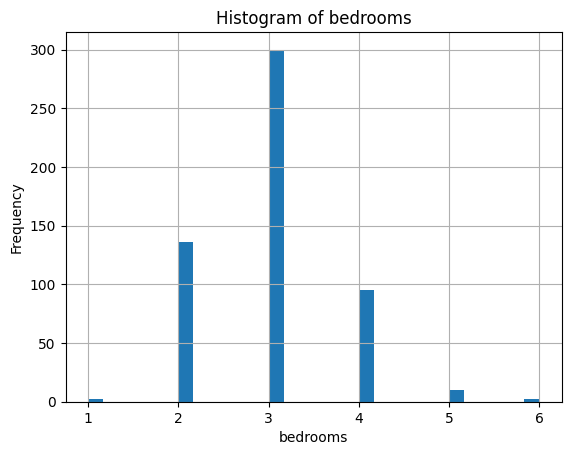

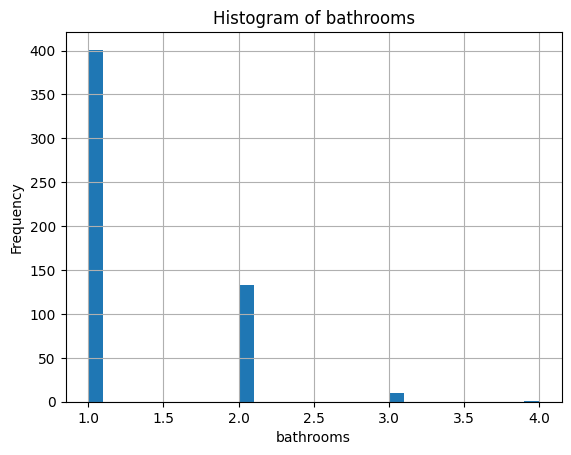

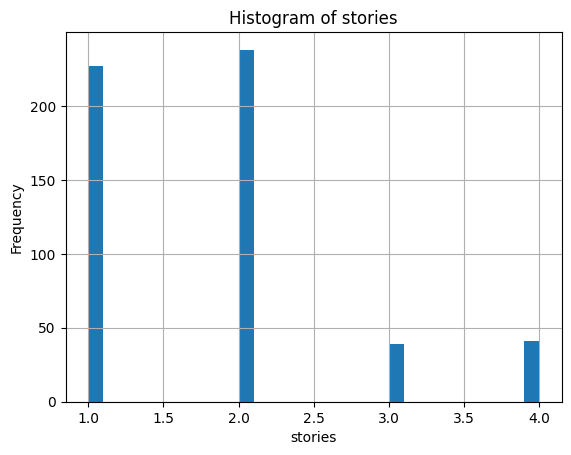

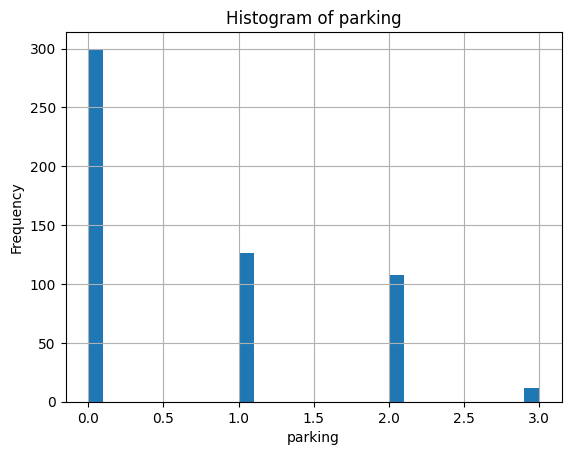

In [19]:
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

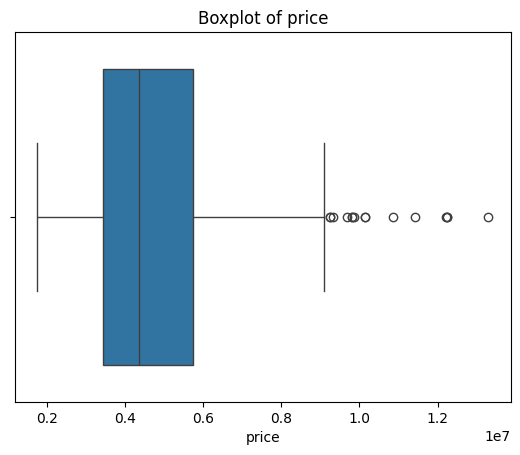

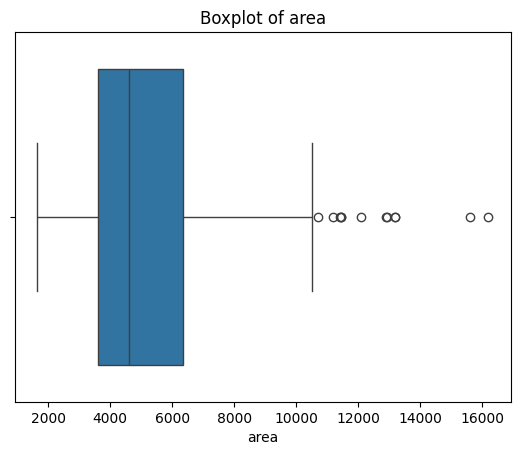

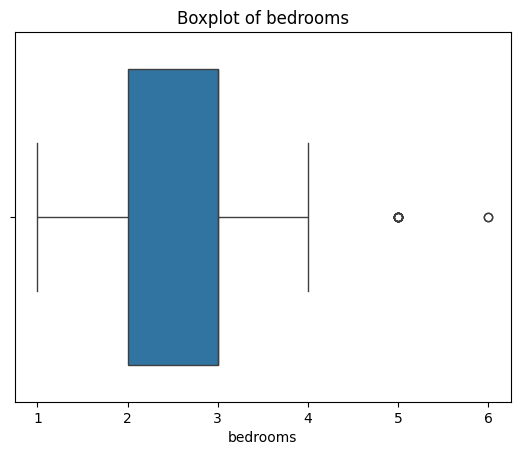

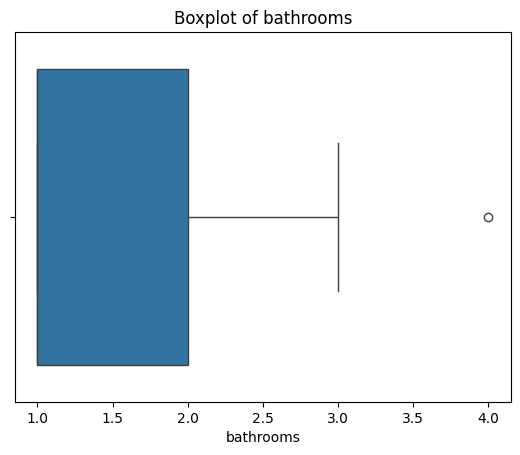

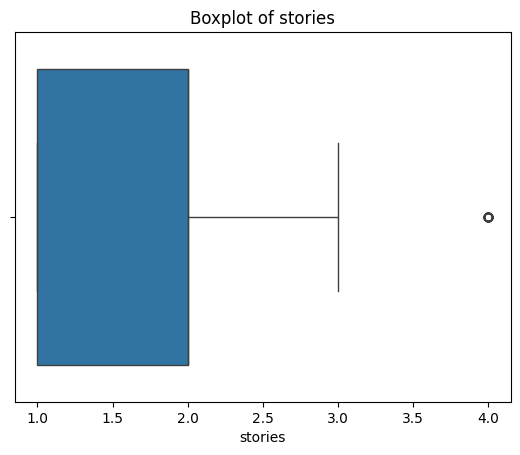

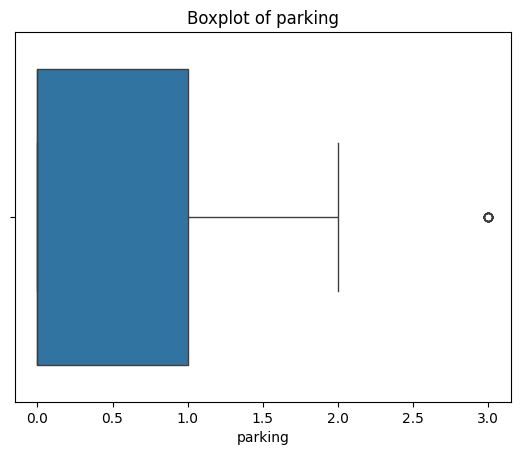

In [20]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [24]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (data[column] < lower) | (data[column] > upper)

    for col in numeric_cols:
     outliers = detect_outliers_iqr(df, col)
     print(f"{col}: {outliers.sum()} outliers")

In [25]:
df['price_outlier_flag'] = detect_outliers_iqr(df, 'price')
df[['price', 'price_outlier_flag']].head()

,price,price_outlier_flag
0,13300000,True
1,12250000,True
2,12250000,True
3,12215000,True
4,11410000,True


In [26]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower, lower,
                             np.where(data[column] > upper, upper, data[column]))
    return data

In [27]:
for col in numeric_cols:
    df = cap_outliers(df, col)

In [28]:
corr = df[numeric_cols].corr()
corr

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.553876,0.381802,0.508576,0.415874,0.380769
area,0.553876,1.000000,0.159563,0.198013,0.076002,0.367799
bedrooms,0.381802,0.159563,1.000000,0.379505,0.449893,0.149738
bathrooms,0.508576,0.198013,0.379505,1.000000,0.314988,0.175172
stories,0.415874,0.076002,0.449893,0.314988,1.000000,0.028590
parking,0.380769,0.367799,0.149738,0.175172,0.028590,1.000000


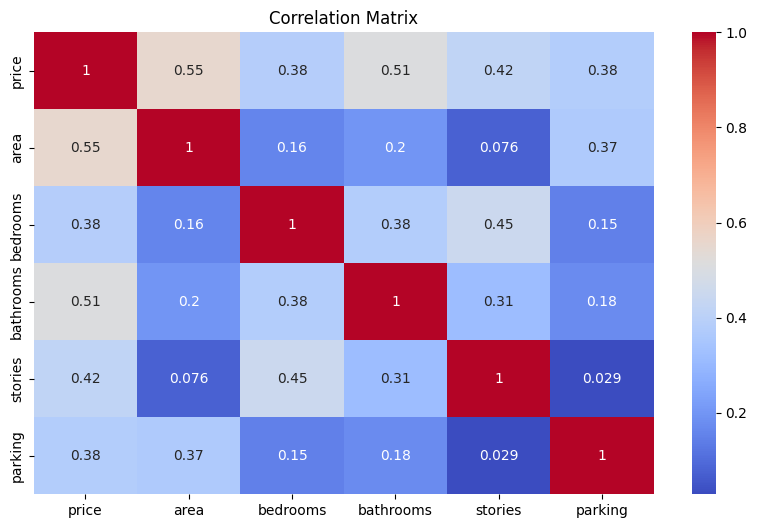

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
corr['price'].sort_values(ascending=False)

,price
price,1.000000
area,0.553876
bathrooms,0.508576
stories,0.415874
bedrooms,0.381802
parking,0.380769


**Interpretation example**

1.sqft_living shows strong positive correlation with price
2.bedrooms has moderate correlation
3.Weak or negative correlations indicate less influence


In [31]:
df.to_csv('cleaned_dataset.csv', index=False)